In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
data=pd.read_csv("C:/Users/lenovo/Desktop/Social_Network_Ads.csv")
data

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [3]:
real_x=data.iloc[:,[2,3]].values
real_y=data.iloc[:,4].values

In [4]:
training_x,test_x,training_y,test_y=train_test_split(real_x,real_y,test_size=0.25,random_state=0)

s_c=StandardScaler()

In [5]:
s_c=StandardScaler()
training_x=s_c.fit_transform(training_x)
test_x=s_c.transform(test_x)

In [6]:
from sklearn.neighbors import KNeighborsClassifier
cls=KNeighborsClassifier(n_neighbors=5)
cls.fit(training_x,training_y)

KNeighborsClassifier()

In [7]:
y_pred=cls.predict(test_x)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1], dtype=int64)

In [8]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

results=confusion_matrix(test_y,y_pred)
print('confusion matrix')
print(results)
print('Accuracy score:',accuracy_score(test_y,y_pred))

confusion matrix
[[64  4]
 [ 3 29]]
Accuracy score: 0.93


In [9]:
import numpy as np

t=np.array([[33,10000]])

In [10]:
pred=cls.predict(t)
pred

array([1], dtype=int64)

In [ ]:
from matplotlib.colors import ListedColormap


C:\Users\lenovo\AppData\Local\Temp\ipykernel_9712\762702327.py:9: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_set[y_set==j,0],x_set[y_set==j,1],c=ListedColormap(("red","green"))(i),label=j)


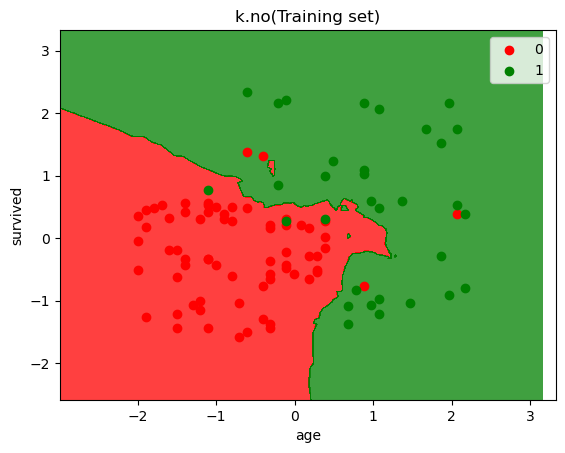

In [13]:
from matplotlib.colors import ListedColormap
x_set,y_set=test_x,test_y
x1,x2 = np.meshgrid(np.arange(start=x_set[:,0].min()-1,stop=x_set[:,0].max()+1,step=0.01),
                    np.arange(start=x_set[:,1].min()-1,stop=x_set[:,1].max()+1,step=0.01))
plt.contourf(x1,x2,cls.predict(np.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape),alpha=0.75,cmap=ListedColormap(("red","green")))
plt.xlim(x1.min(),x2.max())
plt.ylim(x2.min(),x2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set==j,0],x_set[y_set==j,1],c=ListedColormap(("red","green"))(i),label=j)
    
plt.title("k.no(Training set)")
plt.xlabel("age")
plt.ylabel("survived")
plt.legend()
plt.show()